# Projet Modeles de Regression 2021

étudiants : 

- Arthur FREICHE
- Louis POITEVIN

## Données

In [1]:
from scipy.io import loadmat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from statsmodels.graphics.gofplots import qqline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest

In [2]:
mat = loadmat('Database.mat')

In [3]:
col_names = mat['nomcol']
data_values = mat['Datan']

In [4]:
n = len(col_names[0])

In [5]:
res = []
for i in range(0, n):
    res.append(col_names[0,i][0])
    
res

['FEED_D154',
 'FEED_DS_005',
 'FEED_DS_010',
 'FEED_DS_030',
 'FEED_DS_050',
 'FEED_DS_070',
 'FEED_DS_090',
 'FEED_DS_095',
 'DIESEL_DS_005',
 'DIESEL_DS_010',
 'DIESEL_DS_030',
 'DIESEL_DS_050',
 'DIESEL_DS_070',
 'DIESEL_DS_090',
 'DIESEL_DS_095',
 'FEED_SULFUR',
 'FEED_NITROGEN',
 'FEED_MeABP',
 'FEED_KWATSON',
 'PROCESS_T_WABT',
 'X370PLUS',
 'PROCESS_PP_H2_OUT',
 'FEED_TMP',
 'actual.values',
 'PLANT_NAME']

In [6]:
col_names = res

In [7]:
data = pd.DataFrame(data_values, columns=col_names)

In [8]:
data.head(3)

,FEED_D154,FEED_DS_005,FEED_DS_010,FEED_DS_030,FEED_DS_050,FEED_DS_070,FEED_DS_090,FEED_DS_095,DIESEL_DS_005,DIESEL_DS_010,...,FEED_SULFUR,FEED_NITROGEN,FEED_MeABP,FEED_KWATSON,PROCESS_T_WABT,X370PLUS,PROCESS_PP_H2_OUT,FEED_TMP,actual.values,PLANT_NAME
0,0.732158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.637412,0.097841,NaN,NaN,0.503792,NaN,0.483352,NaN,0.733574,27.0
1,0.730097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.668714,0.102562,NaN,NaN,0.514416,NaN,0.462734,NaN,0.729958,27.0
2,0.747273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.666106,0.086539,NaN,NaN,0.532122,NaN,0.454243,NaN,0.798674,27.0


In [9]:
date = pd.read_csv("Date.txt",delimiter="\t")

In [10]:
date.shape

(8000, 1)

In [11]:
cycle = pd.read_csv("CycleNumber.txt",delimiter="\t")

In [12]:
cycle.shape

(8000, 1)

In [13]:
data.shape

(8000, 25)

In [14]:
df = pd.concat([data,date,cycle],axis=1)

In [15]:
df.head()

,FEED_D154,FEED_DS_005,FEED_DS_010,FEED_DS_030,FEED_DS_050,FEED_DS_070,FEED_DS_090,FEED_DS_095,DIESEL_DS_005,DIESEL_DS_010,...,FEED_MeABP,FEED_KWATSON,PROCESS_T_WABT,X370PLUS,PROCESS_PP_H2_OUT,FEED_TMP,actual.values,PLANT_NAME,DATE,CYCLE_NUMBER
0,0.732158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.503792,NaN,0.483352,NaN,0.733574,27.0,24/07/2007,4
1,0.730097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.514416,NaN,0.462734,NaN,0.729958,27.0,07/08/2007,4
2,0.747273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.532122,NaN,0.454243,NaN,0.798674,27.0,21/08/2007,4
3,0.734906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.549828,NaN,0.455298,NaN,0.779385,27.0,04/09/2007,4
4,0.749678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.518665,NaN,0.460993,NaN,0.677517,27.0,02/10/2007,4


In [16]:
df.shape

(8000, 27)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FEED_D154          7976 non-null   float64
 1   FEED_DS_005        3136 non-null   float64
 2   FEED_DS_010        3136 non-null   float64
 3   FEED_DS_030        3136 non-null   float64
 4   FEED_DS_050        3136 non-null   float64
 5   FEED_DS_070        3137 non-null   float64
 6   FEED_DS_090        3136 non-null   float64
 7   FEED_DS_095        3137 non-null   float64
 8   DIESEL_DS_005      3588 non-null   float64
 9   DIESEL_DS_010      3588 non-null   float64
 10  DIESEL_DS_030      3588 non-null   float64
 11  DIESEL_DS_050      3588 non-null   float64
 12  DIESEL_DS_070      3588 non-null   float64
 13  DIESEL_DS_090      3588 non-null   float64
 14  DIESEL_DS_095      3588 non-null   float64
 15  FEED_SULFUR        8000 non-null   float64
 16  FEED_NITROGEN      8000 

# Exploration

j'utilise le dataframe data pour l'exploration pour ne prendre en compte que les données quantitatives mesurables (sans date, cycle) et aussi la variable 'PLANT_NAME' pour une analyse de groupe

In [18]:
df.describe()

,FEED_D154,FEED_DS_005,FEED_DS_010,FEED_DS_030,FEED_DS_050,FEED_DS_070,FEED_DS_090,FEED_DS_095,DIESEL_DS_005,DIESEL_DS_010,...,FEED_NITROGEN,FEED_MeABP,FEED_KWATSON,PROCESS_T_WABT,X370PLUS,PROCESS_PP_H2_OUT,FEED_TMP,actual.values,PLANT_NAME,CYCLE_NUMBER
count,7976.000000,3136.000000,3136.000000,3136.000000,3136.000000,3137.000000,3136.000000,3137.000000,3588.000000,3588.000000,...,8000.000000,3136.000000,3113.000000,7369.000000,3073.000000,6295.000000,3136.000000,5402.000000,8000.000000,8000.000000
mean,0.725331,0.387235,0.435071,0.545378,0.625241,0.703289,0.800249,0.837301,0.193349,0.266521,...,0.185723,0.723734,0.398551,0.536414,0.967114,0.595645,0.712415,0.742638,12.648375,2.368750
std,0.066122,0.090048,0.087803,0.067639,0.050376,0.047612,0.048153,0.048199,0.073325,0.069445,...,0.139806,0.090816,0.121210,0.129384,0.018510,0.188825,0.047050,0.085691,7.451421,1.666469
min,0.000000,0.000000,0.047092,0.181195,0.224143,0.339713,0.394960,0.441423,0.000000,0.043644,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354048,0.000000,1.000000,1.000000
25%,0.693073,0.370558,0.429124,0.528698,0.606740,0.680957,0.772745,0.811755,0.133539,0.205900,...,0.102956,0.690398,0.337093,0.456283,0.964091,0.472434,0.692088,0.688366,6.000000,1.000000
50%,0.737311,0.410578,0.456458,0.552651,0.625046,0.702896,0.802713,0.841243,0.193636,0.264458,...,0.163221,0.723393,0.395502,0.545789,0.966658,0.551366,0.715818,0.751658,12.000000,2.000000
75%,0.766860,0.442008,0.478588,0.579009,0.645818,0.722656,0.827340,0.862649,0.244707,0.318747,...,0.224955,0.760829,0.464880,0.628161,0.969606,0.760298,0.735260,0.793704,20.000000,3.000000
max,1.000000,0.614343,0.646451,0.757761,0.778567,0.878129,0.930114,1.000000,0.401774,0.568852,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.846747,1.000000,27.000000,8.000000


## Visualisation des données globales

### Hist de répartition de la densité des données

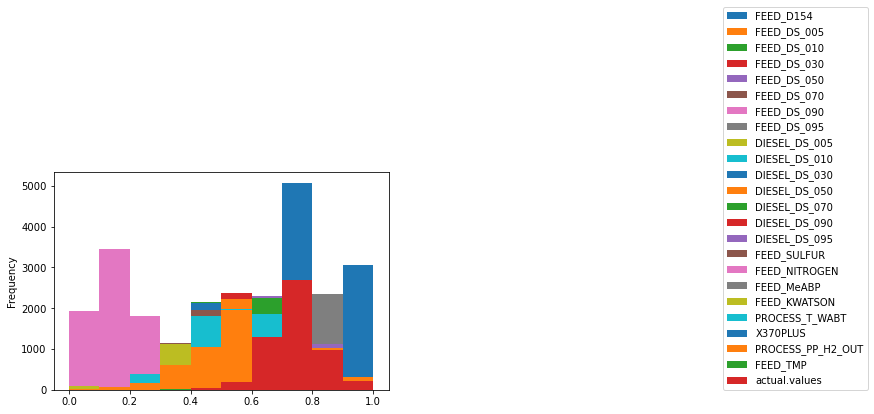

In [19]:
df.iloc[:,:-3].plot.hist()
plt.legend(loc=(2, 0))

Il y'a des colonnes beaucoup plus fourni en terme de données que d'autres.

### Boxplot par variables

<AxesSubplot:>

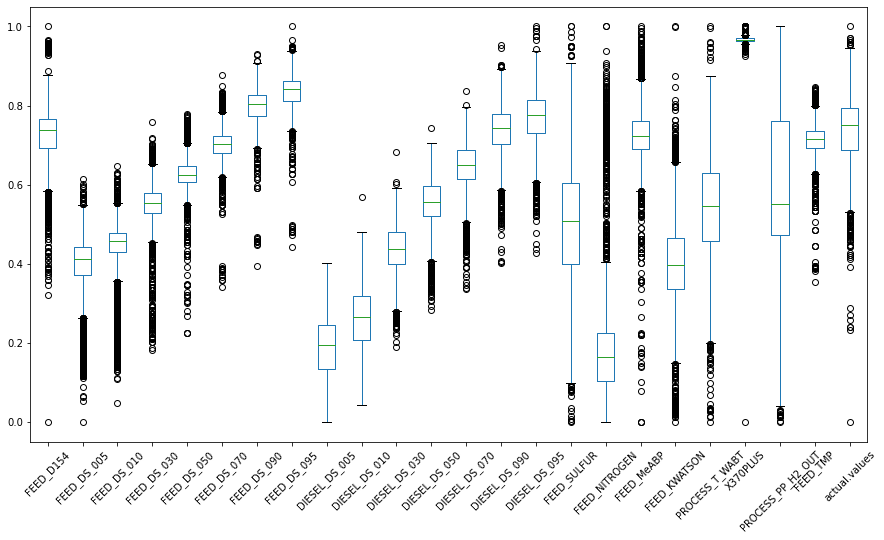

In [20]:
df.iloc[:,:-3].boxplot(grid=False, rot=45, fontsize=10, figsize=(15,8))

Nos données sont très diversifiés et ont beaucoup trop de dimensions pour être exploités

### PCA 

In [21]:
df

,FEED_D154,FEED_DS_005,FEED_DS_010,FEED_DS_030,FEED_DS_050,FEED_DS_070,FEED_DS_090,FEED_DS_095,DIESEL_DS_005,DIESEL_DS_010,...,FEED_MeABP,FEED_KWATSON,PROCESS_T_WABT,X370PLUS,PROCESS_PP_H2_OUT,FEED_TMP,actual.values,PLANT_NAME,DATE,CYCLE_NUMBER
0,0.732158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.503792,NaN,0.483352,NaN,0.733574,27.0,24/07/2007,4
1,0.730097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.514416,NaN,0.462734,NaN,0.729958,27.0,07/08/2007,4
2,0.747273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.532122,NaN,0.454243,NaN,0.798674,27.0,21/08/2007,4
3,0.734906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.549828,NaN,0.455298,NaN,0.779385,27.0,04/09/2007,4
4,0.749678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.518665,NaN,0.460993,NaN,0.677517,27.0,02/10/2007,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.669354,0.336069,0.430682,0.570889,0.648164,0.729933,0.820479,0.865431,0.349915,0.391945,...,0.765057,0.494375,0.484103,0.960717,0.329769,0.727732,0.747859,1.0,22/07/2009,1
7996,0.694279,0.334571,0.423404,0.573886,0.653087,0.739780,0.869070,0.894663,0.336206,0.394995,...,0.773929,0.458246,0.487541,0.960854,0.313151,0.745628,0.725991,1.0,29/07/2009,1
7997,0.674581,0.376526,0.446950,0.588014,0.657154,0.732716,0.867786,0.891598,0.322794,0.371510,...,0.781259,0.498905,0.542996,0.962612,0.318071,0.751032,0.745743,1.0,05/08/2009,1
7998,0.682621,0.352765,0.431538,0.575170,0.654157,0.735285,0.833537,0.877633,0.340974,0.389505,...,0.775858,0.480225,0.553571,0.961409,0.317302,0.738802,0.738689,1.0,19/08/2009,1


In [22]:
data_pca = data[data.columns.drop('actual.values')]

In [23]:
data_pca.isna().sum() / len(data_pca) * 100

FEED_D154             0.3000
FEED_DS_005          60.8000
FEED_DS_010          60.8000
FEED_DS_030          60.8000
FEED_DS_050          60.8000
FEED_DS_070          60.7875
FEED_DS_090          60.8000
FEED_DS_095          60.7875
DIESEL_DS_005        55.1500
DIESEL_DS_010        55.1500
DIESEL_DS_030        55.1500
DIESEL_DS_050        55.1500
DIESEL_DS_070        55.1500
DIESEL_DS_090        55.1500
DIESEL_DS_095        55.1500
FEED_SULFUR           0.0000
FEED_NITROGEN         0.0000
FEED_MeABP           60.8000
FEED_KWATSON         61.0875
PROCESS_T_WABT        7.8875
X370PLUS             61.5875
PROCESS_PP_H2_OUT    21.3125
FEED_TMP             60.8000
PLANT_NAME            0.0000
dtype: float64

On observe que de plus de trois quart des colonnes ont au moins la moitié de données composées de NaN.

In [24]:
scaler = StandardScaler()
x_scaler_pca = scaler.fit_transform(data_pca)
x_scaler_pca.shape

(8000, 24)

In [25]:
pca = PCA()
x_pca_transform = pca.fit_transform(np.nan_to_num(x_scaler_pca))

In [26]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dimension = np.argmax(cumsum >= 0.90) + 1
print("Nombre d'axes : "+str(dimension))

Nombre d'axes : 9


 on voit que la PCA a conservé 9 sur 23 colonnes tout en préservant 90% de l'informations des données 

In [27]:
np.sum(pca.explained_variance_ratio_)

1.0

In [28]:
pca_principal_component = pca.explained_variance_ratio_[0:9]

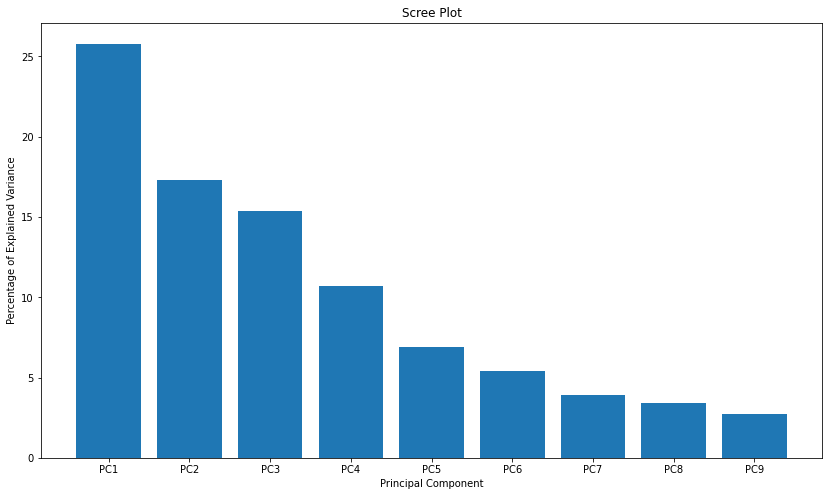

In [29]:
per_var = np.round(pca_principal_component* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(14,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

La première composante accapare plus de 25% de l’information disponible. Il y a un fort ‘’effet
taille’’ dans nos données.

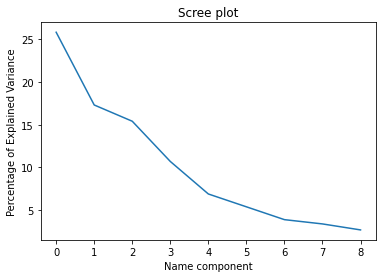

In [30]:
plt.plot(np.round(pca_principal_component* 100, decimals=1))
plt.title("Scree plot")
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Name component")
plt.show()

L'effet de "cassure" observé sur la courbe  permet de retenir le nombre de facteur a retenir. ici 2 (component 0 et 1) 

In [31]:
x_pca_transform.shape

(8000, 24)

In [32]:
pca = PCA(n_components=2)
x_pca_transform = pca.fit_transform(np.nan_to_num(x_scaler_pca))

In [33]:
dataset = pd.DataFrame()
dataset['PCA_C0'] = x_pca_transform[:,0].tolist()
dataset['PCA_C1'] = x_pca_transform[:,1].tolist()
time_serie_pca = pd.concat([dataset,df['DATE']],axis=1)
time_serie_pca['DATE'] = pd.to_datetime(df['DATE'])
time_serie_pca.set_index(time_serie_pca['DATE'], drop=True, inplace=True)
del time_serie_pca['DATE']

In [34]:
time_serie_pca.head()

,PCA_C0,PCA_C1
DATE,,
2007-07-24,-0.499992,-1.475262
2007-07-08,-0.533186,-1.590304
2007-08-21,-0.601200,-1.664759
2007-04-09,-0.469123,-1.675829
2007-02-10,-0.697681,-1.631668


<AxesSubplot:xlabel='DATE'>

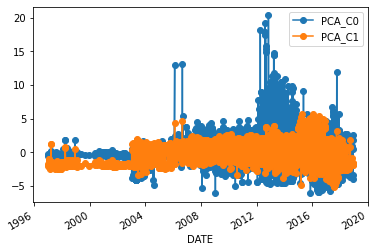

In [35]:
time_serie_pca.plot(linestyle=None, style=['o', 'o']) 

On voit que les deux dimensions de la PCA suivent la même tendance spectral, donc les données evoluent de manière semblable sans que ces deux composants soientt corréles.

### Representation site par site

<AxesSubplot:ylabel='PLANT_NAME'>

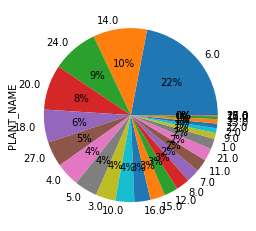

In [36]:
df["PLANT_NAME"].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

Le site 6 contient le plus de données avec 1/5. C'est sans doute le site pour lequel il va falloir être le plus à l'affut pour le nettoyage de donnée si de nombreux données font parties de la selection de variable pour l'analyse de groupe

In [37]:
time_serie_pca['PLANT_NAME'] = data['PLANT_NAME']

In [38]:
time_serie_pca = time_serie_pca.reset_index()
time_serie_pca['PLANT_NAME'] = data['PLANT_NAME']
time_serie_pca

,DATE,PCA_C0,PCA_C1,PLANT_NAME
0,2007-07-24,-0.499992,-1.475262,27.0
1,2007-07-08,-0.533186,-1.590304,27.0
2,2007-08-21,-0.601200,-1.664759,27.0
3,2007-04-09,-0.469123,-1.675829,27.0
4,2007-02-10,-0.697681,-1.631668,27.0
...,...,...,...,...
7995,2009-07-22,-1.453508,1.566167,1.0
7996,2009-07-29,-2.069547,1.439154,1.0
7997,2009-05-08,-1.167279,0.095054,1.0
7998,2009-08-19,-1.128276,0.790919,1.0


C:\Users\laou6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


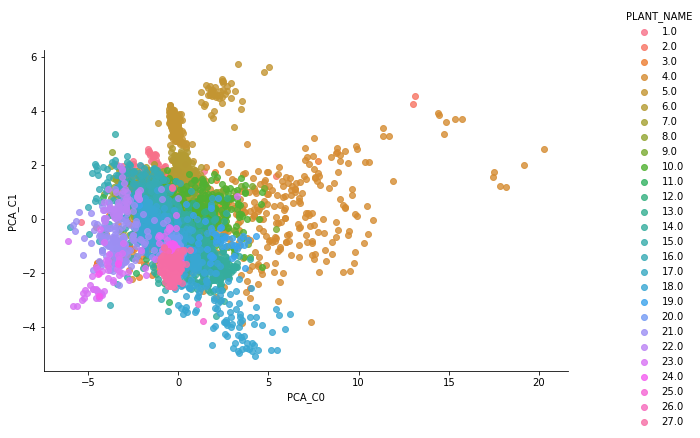

In [39]:
import seaborn as sns
sns.lmplot('PCA_C0', 'PCA_C1', time_serie_pca, hue='PLANT_NAME', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

On remarque une forte concentration de points au même endroit, ce qui indiquerait que les raffineries n’ont pas nécessairement des méthodes différentes de production d’une à l’autre sinon on aurait pu facilement identifier des clusters séparés. Ici les points isolés semblent être des outliers potentiels qu’il faudra traiter avant de construire nos modèles.

## Suppression des colonnes inutiles

In [40]:
df = df.drop(columns = ['FEED_TMP', 'FEED_DS_030', 'FEED_DS_050', 'FEED_DS_070', 'FEED_MeABP', 'DIESEL_DS_030', 'DIESEL_DS_050', 'DIESEL_DS_070'])

## Suppression de lignes

### Valeurs manquantes

In [41]:
df = df.dropna()

In [42]:
df.shape

(2074, 19)

### Sites peu représentés

In [43]:
df["PLANT_NAME"].value_counts()

4.0     326
14.0    322
18.0    285
10.0    270
15.0    208
21.0    184
12.0    183
1.0      88
3.0      86
16.0     72
19.0     40
24.0      6
11.0      3
9.0       1
Name: PLANT_NAME, dtype: int64

In [44]:
df = df[~df["PLANT_NAME"].isin([19.0, 24.0, 11.0, 9.0])]

## Valeurs suspectes

### Isolation Forest

In [45]:
len(df)

2024

In [46]:
clf = IsolationForest(max_samples=300, contamination = 0.05, random_state=42) # on enleve 5% du dataset
outliers = clf.fit_predict(df.iloc[:,:16])

In [47]:
df["IF_outlier"]=outliers

In [48]:
df = df[df["IF_outlier"]==1]

In [49]:
len(df)

1922

## Boxplot après nettoyage

<AxesSubplot:>

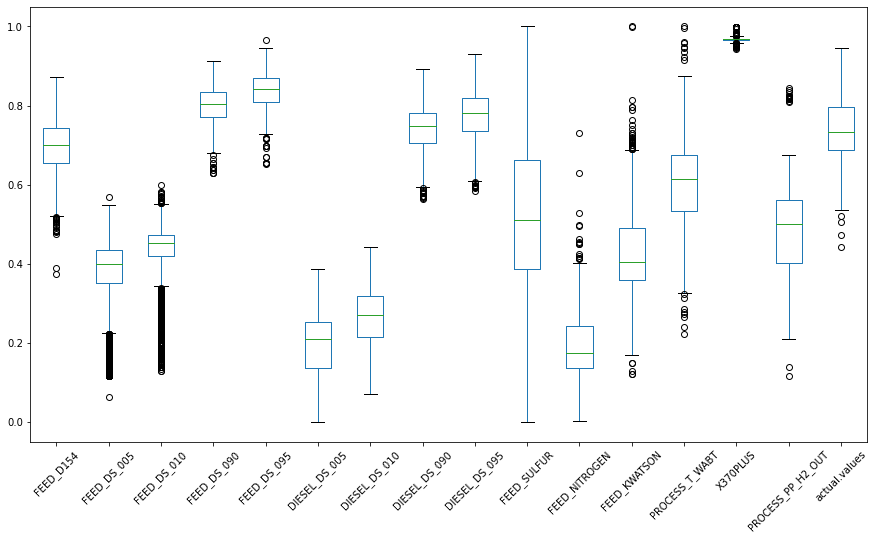

In [50]:
df.iloc[:,:16].boxplot(grid=False, rot=45, fontsize=10, figsize=(15,8))

On a enlevé beaucoup de valeurs aberrantes. On devrait pouvoir obtenir un modèle décent avec ces données.

## Stratified Sampling

In [51]:
strat_train_set, strat_test_set = train_test_split(df.iloc[:,:-2], test_size=.2, random_state=42, stratify=df['PLANT_NAME']) # à voir pour la taille du test set

In [52]:
strat_train_set["PLANT_NAME"].value_counts()

14.0    255
18.0    222
4.0     214
10.0    214
15.0    166
21.0    147
12.0    146
3.0      69
1.0      68
16.0     36
Name: PLANT_NAME, dtype: int64

In [53]:
strat_test_set["PLANT_NAME"].value_counts()

14.0    64
18.0    56
10.0    53
4.0     53
15.0    42
21.0    37
12.0    37
1.0     17
3.0     17
16.0     9
Name: PLANT_NAME, dtype: int64

On vérifie ci dessus la répartition des sites dans la base de validation par rapport à la base de calibration.

## Modèles

### Global

#### Linear Model

In [54]:
reg = linear_model.LinearRegression()

In [55]:
y_train = strat_train_set.iloc[:,15].values 
X_train = strat_train_set.iloc[:,0:15].values

y_test = strat_test_set.iloc[:,15].values 
X_test = strat_test_set.iloc[:,0:15].values 

In [56]:
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
reg.coef_

array([ 0.64935062, -0.12543204,  0.08269918, -0.78572732,  0.69251694,
        0.06864668,  0.29192664,  0.88650909, -0.41466464, -0.0448232 ,
        0.1256757 , -0.01506218,  0.10167985,  0.82996384,  0.09171192])

In [58]:
reg.intercept_

-0.9866486568169948

In [59]:
y_pred = reg.predict(X_test)

In [60]:
print('RMSEP LM : '+str(mean_squared_error(y_test, y_pred,squared=False)))
print('MSE LM : '+str(mean_squared_error(y_test, y_pred)))
print('MAE LM : '+str(mean_absolute_error(y_test, y_pred)))
print('R^2 LM : '+str(r2_score(y_test, y_pred)))

RMSEP LM : 0.04132795542220646
MSE LM : 0.0017079998993798843
MAE LM : 0.03051462937418349
R^2 LM : 0.7183546464097665


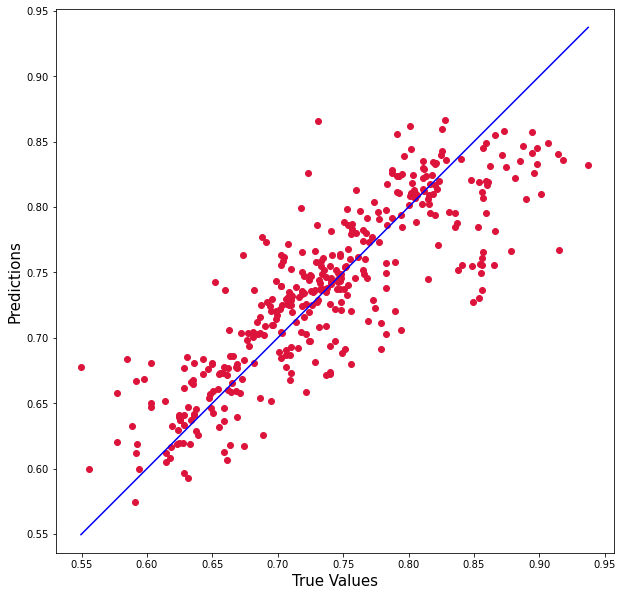

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Random Forest

In [62]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred_rf = regr.predict(X_test)

In [63]:
print('RMSEP RF : '+str(mean_squared_error(y_test, y_pred_rf,squared=False)))
print('MSE RF : '+str(mean_squared_error(y_test, y_pred_rf)))
print('MAE RF: '+str(mean_absolute_error(y_test, y_pred_rf)))
print('R^2 RF: '+str(r2_score(y_test, y_pred_rf)))

RMSEP RF : 0.049244055235560205
MSE RF : 0.0024249769760429046
MAE RF: 0.03673158421518562
R^2 RF: 0.6001267341328611


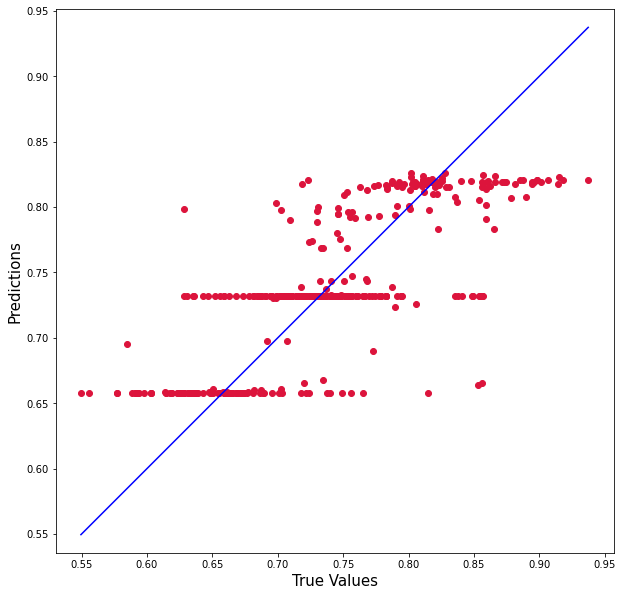

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rf, c='crimson')

p1 = max(max(y_pred_rf), max(y_test))
p2 = min(min(y_pred_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### KNN regressor

In [65]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)

rmsep_knn = mean_squared_error(y_test, y_pred_knn,squared=False)
mse_knn = mean_squared_error(y_test,y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)



print('RMSEP KNN: '+str(mean_squared_error(y_test, y_pred_knn,squared=False)))
print('MSE KNN: '+str(mean_squared_error(y_test,y_pred_knn)))
print('MAE KNN: '+str(mean_absolute_error(y_test, y_pred_knn)))
print('R^2 KNN: '+str(r2_score(y_test, y_pred_knn)))

RMSEP KNN: 0.03516639723189932
MSE KNN: 0.0012366754942717364
MAE KNN: 0.02278493086029283
R^2 KNN: 0.7960749839698485


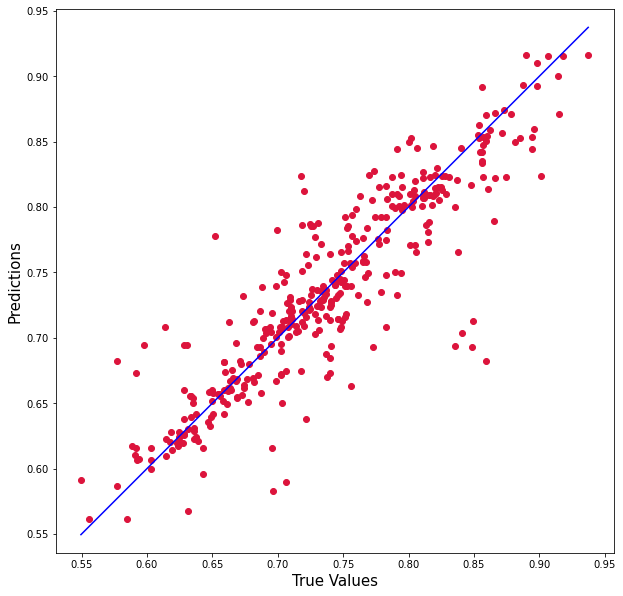

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_knn, c='crimson')

p1 = max(max(y_pred_knn), max(y_test))
p2 = min(min(y_pred_knn), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Site par site

In [67]:
sites=strat_train_set["PLANT_NAME"].value_counts().index.values

In [68]:
sites

array([14., 18.,  4., 10., 15., 21., 12.,  3.,  1., 16.])

In [69]:
df_sites_train=[]
df_sites_test=[]
for site in sites:
    tmp_1 = strat_train_set[strat_train_set["PLANT_NAME"]==site]
    df_sites_train.append(tmp_1)
    tmp_2 = strat_test_set[strat_test_set["PLANT_NAME"]==site]
    df_sites_test.append(tmp_2)

In [70]:
df_sites_train[0]["PLANT_NAME"].value_counts()

14.0    255
Name: PLANT_NAME, dtype: int64

In [71]:
y_train_sites = []
X_train_sites = []
y_test_sites = []
X_test_sites = []
for i in range (0, len(sites)):
    y_train_sites.append(df_sites_train[i].iloc[:,15].values)
    X_train_sites.append(df_sites_train[i].iloc[:,0:15].values)
    y_test_sites.append(df_sites_test[i].iloc[:,15].values)
    X_test_sites.append(df_sites_test[i].iloc[:,0:15].values)


#### Linear Model

In [72]:
for i in range (0, len(sites)):
    reg_site = linear_model.LinearRegression()
    reg_site.fit(X_train_sites[i],y_train_sites[i])
    y_pred_site = reg_site.predict(X_test_sites[i])
    print("Site {} : RMSEP = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site,squared=False)))
    print("Site {} : MSE = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site)))
    print("Site {} : MAE = {}".format(sites[i], mean_absolute_error(y_test_sites[i], y_pred_site)))
    print("Site {} : R^2 = {}".format(sites[i], r2_score(y_test_sites[i], y_pred_site)))
    print()

Site 14.0 : RMSEP = 0.02561900464082364
Site 14.0 : MSE = 0.0006563333987865433
Site 14.0 : MAE = 0.01634365134293659
Site 14.0 : R^2 = 0.2888634428091369

Site 18.0 : RMSEP = 0.038869247754738295
Site 18.0 : MSE = 0.001510818421019228
Site 18.0 : MAE = 0.029548463450711732
Site 18.0 : R^2 = 0.6392264034085111

Site 4.0 : RMSEP = 0.030248367021758277
Site 4.0 : MSE = 0.0009149637074829938
Site 4.0 : MAE = 0.023612584708512567
Site 4.0 : R^2 = 0.7805825359383414

Site 10.0 : RMSEP = 0.028445977276585935
Site 10.0 : MSE = 0.0008091736232200433
Site 10.0 : MAE = 0.02253897974022428
Site 10.0 : R^2 = 0.8260260197624563

Site 15.0 : RMSEP = 0.02119087900006015
Site 15.0 : MSE = 0.00044905335279519024
Site 15.0 : MAE = 0.01638524137722001
Site 15.0 : R^2 = 0.3649174845131775

Site 21.0 : RMSEP = 0.03306850042995362
Site 21.0 : MSE = 0.0010935257206858427
Site 21.0 : MAE = 0.024349935686440363
Site 21.0 : R^2 = 0.5489018353144761

Site 12.0 : RMSEP = 0.016794767223287703
Site 12.0 : MSE = 0.0

### Random Forest

In [73]:
for i in range (0, len(sites)):
    rf_site = RandomForestRegressor(max_depth=2, random_state=0)
    rf_site.fit(X_train_sites[i],y_train_sites[i])
    y_pred_site = rf_site.predict(X_test_sites[i])
    print("Site {} : RMSEP = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site,squared=False)))
    print("Site {} : MSE = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site)))
    print("Site {} : MAE = {}".format(sites[i], mean_absolute_error(y_test_sites[i], y_pred_site)))
    print("Site {} : R^2 = {}".format(sites[i], r2_score(y_test_sites[i], y_pred_site)))
    print()

Site 14.0 : RMSEP = 0.018036106016286812
Site 14.0 : MSE = 0.0003253011202307373
Site 14.0 : MAE = 0.012109839709623609
Site 14.0 : R^2 = 0.6475365734565441

Site 18.0 : RMSEP = 0.04219077405618144
Site 18.0 : MSE = 0.0017800614154597533
Site 18.0 : MAE = 0.028794578744898162
Site 18.0 : R^2 = 0.5749329303412176

Site 4.0 : RMSEP = 0.04236897355364076
Site 4.0 : MSE = 0.0017951299199891106
Site 4.0 : MAE = 0.03366948773357767
Site 4.0 : R^2 = 0.5695098598077017

Site 10.0 : RMSEP = 0.04542347586936674
Site 10.0 : MSE = 0.002063292160054943
Site 10.0 : MAE = 0.031744086218060706
Site 10.0 : R^2 = 0.5563879751180871

Site 15.0 : RMSEP = 0.021784394794527207
Site 15.0 : MSE = 0.000474559856563824
Site 15.0 : MAE = 0.01756414935578057
Site 15.0 : R^2 = 0.3288444110713984

Site 21.0 : RMSEP = 0.03922360841300881
Site 21.0 : MSE = 0.0015384914569370552
Site 21.0 : MAE = 0.03239632501345156
Site 21.0 : R^2 = 0.36534581722193926

Site 12.0 : RMSEP = 0.016534894247411978
Site 12.0 : MSE = 0.000

### KNN Regression

In [74]:
for i in range (0, len(sites)):
    knn_site = KNeighborsRegressor(n_neighbors=2)
    knn_site.fit(X_train_sites[i],y_train_sites[i])
    y_pred_site = knn_site.predict(X_test_sites[i])
    print("Site {} : RMSEP = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site,squared=False)))
    print("Site {} : MSE = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_site)))
    print("Site {} : MAE = {}".format(sites[i], mean_absolute_error(y_test_sites[i], y_pred_site)))
    print("Site {} : R^2 = {}".format(sites[i], r2_score(y_test_sites[i], y_pred_site)))
    print()

Site 14.0 : RMSEP = 0.018015833934310256
Site 14.0 : MSE = 0.000324570272348645
Site 14.0 : MAE = 0.010798108800482209
Site 14.0 : R^2 = 0.6483284463791507

Site 18.0 : RMSEP = 0.05287806461642777
Site 18.0 : MSE = 0.002796089717579111
Site 18.0 : MAE = 0.03426937791391425
Site 18.0 : R^2 = 0.33231199079306295

Site 4.0 : RMSEP = 0.040995137694957745
Site 4.0 : MSE = 0.0016806013146285455
Site 4.0 : MAE = 0.030134262655778097
Site 4.0 : R^2 = 0.5969749668334914

Site 10.0 : RMSEP = 0.04611232014985581
Site 10.0 : MSE = 0.002126346069602798
Site 10.0 : MAE = 0.033448201348846275
Site 10.0 : R^2 = 0.5428312558939419

Site 15.0 : RMSEP = 0.022896361231223305
Site 15.0 : MSE = 0.0005242433576306655
Site 15.0 : MAE = 0.017862149561452094
Site 15.0 : R^2 = 0.2585785448011313

Site 21.0 : RMSEP = 0.02553257434259954
Site 21.0 : MSE = 0.0006519123525603723
Site 21.0 : MAE = 0.017787931046520575
Site 21.0 : R^2 = 0.7310749439058774

Site 12.0 : RMSEP = 0.014855198059749213
Site 12.0 : MSE = 0.0

## Optimisation du modele

### Correlation

<AxesSubplot:>

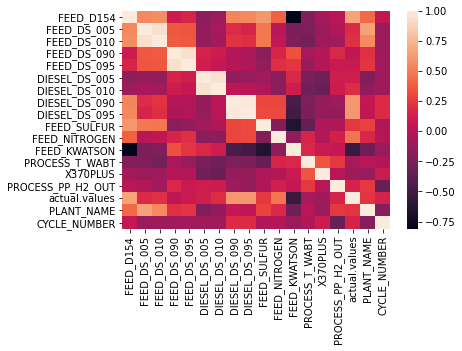

In [75]:
corr = df.drop('IF_outlier', 1).corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


Certaines variables ont un fort effet de corrélation (negatif ou positif) sur notre valeur explicative actual.values.
Comme nous avons vu avec la PCA qu'il y'avait un fort effet de taille dans nos données, il est interessant de voir les variations du modèles en fonction du nombre de variables selectionnées

In [76]:
X_train.shape

(1537, 15)

In [77]:
rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train[:,[0,6,9,10,11]], y_train)
y_pred_rf = rf.predict(X_test[:,[0,6,9,10,11]])

In [78]:
print('RMSEP RF: '+str(mean_squared_error(y_test, y_pred_rf, squared=False)))
print('MSE RF: '+str(mean_squared_error(y_test, y_pred_rf)))
print('MAE RF: '+str(mean_absolute_error(y_test, y_pred_rf)))
print('R^2 : '+str(r2_score(y_test, y_pred_rf)))

RMSEP RF: 0.04922659141021087
MSE RF: 0.0024232573018678465
MAE RF: 0.03675558429456444
R^2 : 0.6004103045483337


### Features selection (Test de tous les modèles)

In [79]:
import numpy as np
from itertools import combinations, chain
from scipy.special import perm



import numpy as np
from itertools import combinations, chain
from scipy.special import comb

def comb_index(n, k):
    count = comb(n, k, exact=True)
    index = np.fromiter(chain.from_iterable(combinations(range(n), k)), 
                        int, count=count*k)
    return index.reshape(-1, k)



def testAllModele(X_train,Y_train,X_test,Y_test):
    score = []
    #print(X_train.shape[1])
    for i in range(1,16):
        #all_combinaison = np.array(list(itertools.permutations(range(0,15),i)))
        idx = comb_index(15, i)
        #print(all_combinaison)
        for c in idx :
            reg = linear_model.LinearRegression()
            #print('combinaison: '+str(combinaison))
            reg.fit(X_train[:,c],y_train)
            y_pred = reg.predict(X_test[:,c])
            scoring = mean_squared_error(y_test, y_pred,squared=False)
            #print('Score: '+str(scoring))
            score.append([c,scoring])
        #print(i)
    return score
            
            
        
score = testAllModele(X_train,y_train,X_test,y_test)  

In [80]:
len(score)

32767

In [81]:
best_score = min(score, key=lambda x: x[1])

In [82]:
print('Features retenus: '+str(list(strat_train_set.columns[best_score[0]])))
print()
print('RMSEP: '+str(best_score[1]))

Features retenus: ['FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT']

RMSEP: 0.04020414323959952


###  Hyper parameter tuning KNN Regression

Voyons s'il est possible d'améliorer les performances du modèle par la recherche de valeurs optimales d'un parametre par rapport à une métrique choisie

Prenons la RMSEP, regardons la tendance de la valeur de cette metrique sur le modele en fonction du nombre de voisin

In [83]:
scores=[]
k_range = range(2,100)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    model = knn.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred,squared=False))

Text(0.5, 1.0, 'RMSEP en fonction du parametre K neigbors')

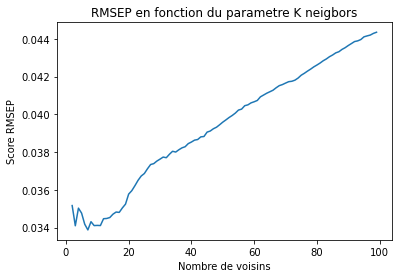

In [84]:
# allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score RMSEP')
plt.title('RMSEP en fonction du parametre K neigbors')

On voit que pour obtenir une RMSEP optimal, il faut être autour de ~ 5 voisins.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

# Fonction grid search par metrique recherché
def Grid_Search(model, parameters, X_train, Y_train, X_test,Y_test, metric = mean_absolute_error, squared=False ):
    
    
    # Construction de la fonction score en fonction de la metrique
    if metric == mean_squared_error : 
        custom_scorer= make_scorer(metric,squared=squared, greater_is_better=False)
    elif metric == r2_score:
        custom_scorer= make_scorer(metric, greater_is_better=True)
    else :
        custom_scorer= make_scorer(metric, greater_is_better=False)

    # Construction du meilleur modèle en fonction du paramètre
    testParametersModel = GridSearchCV(model, parameters,scoring=custom_scorer)
    grid_fit = testParametersModel.fit(X_train,Y_train)
    best_model=  grid_fit.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Resumé
    print("Metrique: "+str(metric))
    print("Meilleur modele: "+str(best_model))
    
    if metric == mean_squared_error and squared == True :
        print('MSE: '+str(mean_squared_error(y_test,y_pred)))
    if metric == mean_squared_error and squared == False :
        print('RMSEP: '+str(mean_squared_error(y_test, y_pred,squared=False)))
    
    if metric == mean_absolute_error :
        print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
        
        
    if metric == r2_score :
        print('R^2 KNN: '+str(r2_score(y_test, y_pred)))
    
    return best_model
    

In [86]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [87]:
parameters_knn = {'n_neighbors': range(1,29)}
# On peut pas aller au dela de 29 à cause de la taille de certain test_set car nneigbor <= n_sample

### Site par site

In [88]:
scores = []
for i in range (0, len(sites)):
    custom_scorer = make_scorer(mean_squared_error,squared=False,greater_is_better=False)
    testParametersModel = GridSearchCV(KNeighborsRegressor(), parameters_knn,scoring=custom_scorer)
    grid_fit = testParametersModel.fit(X_train_sites[i],y_train_sites[i])
    best_model =  grid_fit.best_estimator_
    y_pred_sites_knn = best_model.predict(X_test_sites[i])
    print("Meilleur modele: "+str(best_model))
    print("Site {} : RMSEP = {}".format(sites[i], mean_squared_error(y_test_sites[i], y_pred_sites_knn,squared=False)))
    print()

Meilleur modele: KNeighborsRegressor(n_neighbors=3)
Site 14.0 : RMSEP = 0.0198099460767086

Meilleur modele: KNeighborsRegressor(n_neighbors=7)
Site 18.0 : RMSEP = 0.04100455429351703

Meilleur modele: KNeighborsRegressor(n_neighbors=2)
Site 4.0 : RMSEP = 0.040995137694957745

Meilleur modele: KNeighborsRegressor(n_neighbors=4)
Site 10.0 : RMSEP = 0.040262892125735035

Meilleur modele: KNeighborsRegressor(n_neighbors=7)
Site 15.0 : RMSEP = 0.02228766082365602

Meilleur modele: KNeighborsRegressor()
Site 21.0 : RMSEP = 0.03166831673191675

Meilleur modele: KNeighborsRegressor(n_neighbors=8)
Site 12.0 : RMSEP = 0.015136188243038322

Meilleur modele: KNeighborsRegressor(n_neighbors=3)
Site 3.0 : RMSEP = 0.025630951968806326

Meilleur modele: KNeighborsRegressor(n_neighbors=16)
Site 1.0 : RMSEP = 0.024222038030504524

Meilleur modele: KNeighborsRegressor(n_neighbors=1)
Site 16.0 : RMSEP = 0.020502102684683936



In [89]:
# Le nombre de K-voisin diffèrent selon les sites. Cela peut-être dû à la diversité de proportion de taille des données dans le training set

### Global

#### RootMeanSquaredError

In [90]:
best_model_KNN_RMSEP = Grid_Search(KNeighborsRegressor(),parameters_knn,X_train,y_train,X_test,y_test, metric=mean_squared_error,squared=False)
print("Ancien RMSEP: "+str(rmsep_knn))

Metrique: <function mean_squared_error at 0x000001435DE4CEE0>
Meilleur modele: KNeighborsRegressor(n_neighbors=3)
RMSEP: 0.034096592287052634
Ancien RMSEP: 0.03516639723189932


On arrive à un nombre de 3 voisins pour l'optimisation du RMSEP avec l'algorithme KNN

#### MeanSquaredError

In [91]:
best_model_KNN_RMSEP = Grid_Search(KNeighborsRegressor(),parameters_knn,X_train,y_train,X_test,y_test, metric=mean_squared_error,squared=True)
print("Ancien MSE: "+str(mse_knn))

Metrique: <function mean_squared_error at 0x000001435DE4CEE0>
Meilleur modele: KNeighborsRegressor(n_neighbors=3)
MSE: 0.001162577605589497
Ancien MSE: 0.0012366754942717364


Légère amélioration

#### R^2 score ( Coefficient de détermination)

In [92]:
best_model_KNN_R2 = Grid_Search(KNeighborsRegressor(),parameters_knn,X_train,y_train,X_test,y_test, metric = r2_score)
print("Ancien R^2: "+str(r2_knn))

Metrique: <function r2_score at 0x000001435DE513A0>
Meilleur modele: KNeighborsRegressor(n_neighbors=3)
R^2 KNN: 0.8082935596651843
Ancien R^2: 0.7960749839698485


Légère amélioration

#### MeanAbsoluteError

In [93]:
best_model_KNN_MAE = Grid_Search(KNeighborsRegressor(),parameters_knn,X_train,y_train,X_test,y_test, metric = mean_absolute_error)
print("Ancien MAE: "+str(mae_knn))

Metrique: <function mean_absolute_error at 0x000001435DE4CDC0>
Meilleur modele: KNeighborsRegressor(n_neighbors=4)
MAE: 0.022855278485554208
Ancien MAE: 0.02278493086029283


Légère réduction donc stabilisation. Ici on voit que le modele adéquat est pour n_neighbor = 4

Globalement, le modèle est meilleur avec n_neighbor=3 comme nombre de voisins pour KNRegressor pour chaque métrique sauf pour MAE avec n_neighbor=4